  Nome: Emanuel Victor da Silva Favorato
  
  Número USP: 12558151

In [37]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

# **Questão 1:** Para a rede do livro "Os miseráveis" (base lesmis), calcule o terceiro e quarto momento do grau. Considere o maior componente conectado.

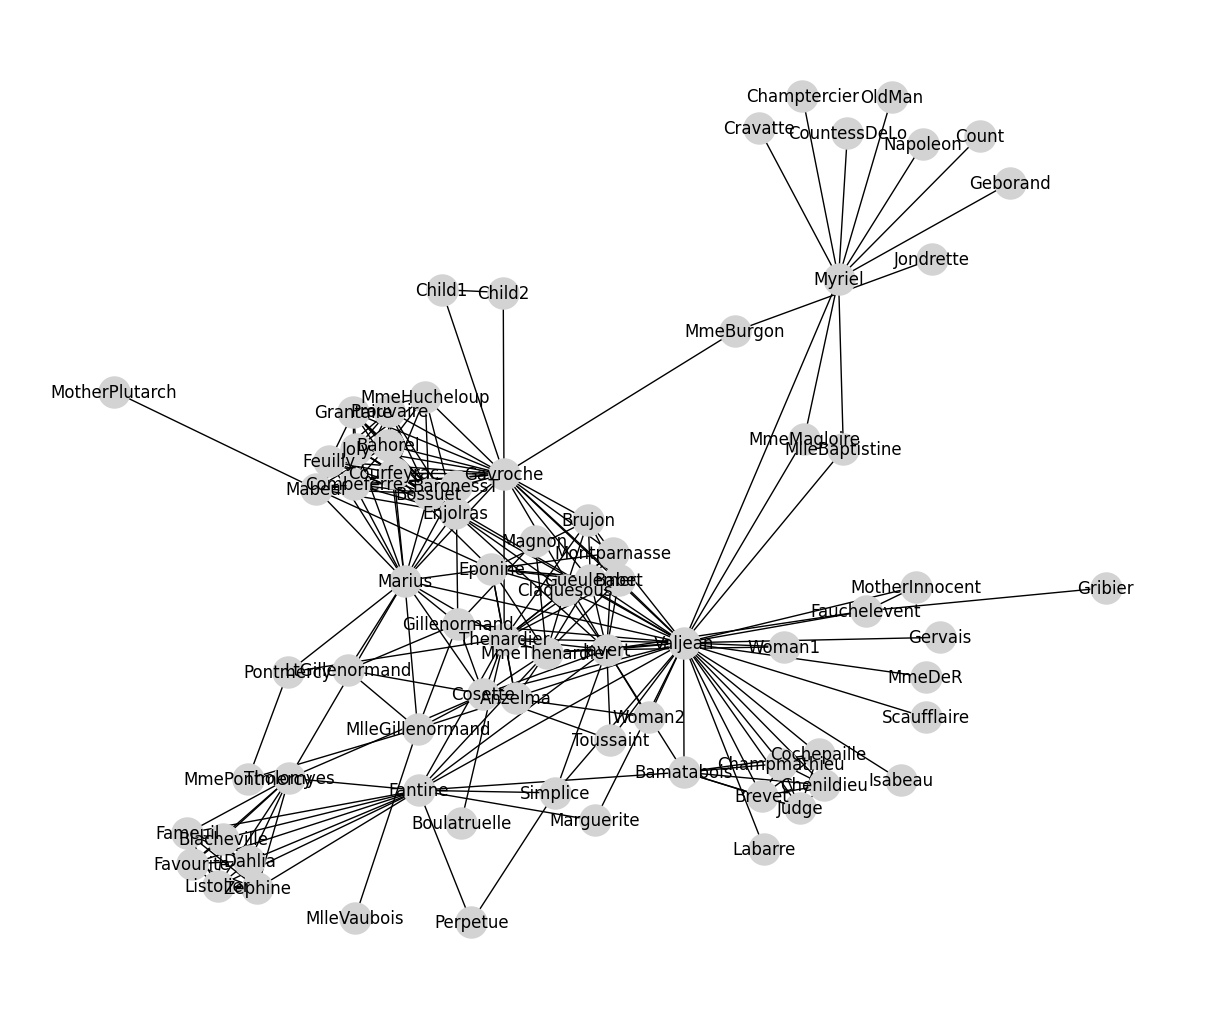

In [31]:
G= nx.read_gml("lesmis.gml") # Read the network

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [32]:
# Transformamos o grafo em uma rede sem direção.

G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Selecionando apenas o maior componente conectado

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Transformando os labels em números inteiros, começando com 0:

G = nx.convert_node_labels_to_integers(G, first_label=0)

In [33]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

print('Terceiro momento de k:', round(momment(G,3)))
print('Quartomomento de k:', round(momment(G,4)))

Terceiro momento de k: 1408.0
Quartomomento de k: 33593.0


Portanto, temos que o terceiro e o quarto momento, considerando a componente mais conectada, são, respectivamente, 1408 e 33593.

# **Questão 2:** Implemente uma rotina para calcular a medida de complexidade. Qual o valor da complexidade para a rede de energia elétrica dos EUA (Base powergrid).

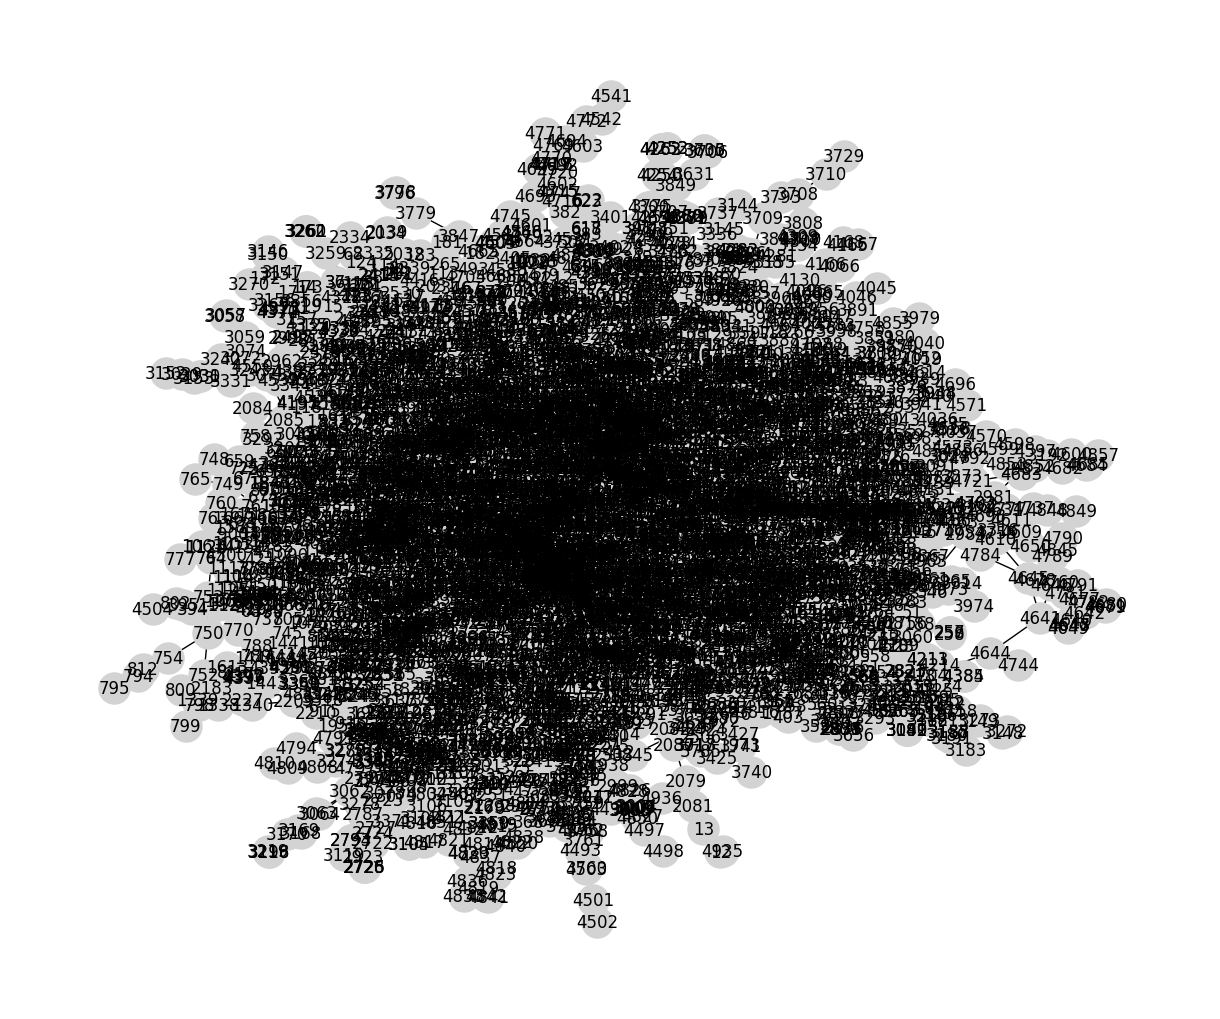

In [17]:
G= G=nx.read_edgelist("powergrid.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [26]:
# Transformamos o grafo em uma rede sem direção.

G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

In [27]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

print('O coeficiente de complexidade é igual a', round(momment(G,2)/momment(G,1), 2))

O coeficiente de complexidade é igual a 3.87


# **Questão 3:** Implemente uma rotina para calcular a entropia de Shannon e calcule essa medida para a base de estradas da Europa (base euroroad).

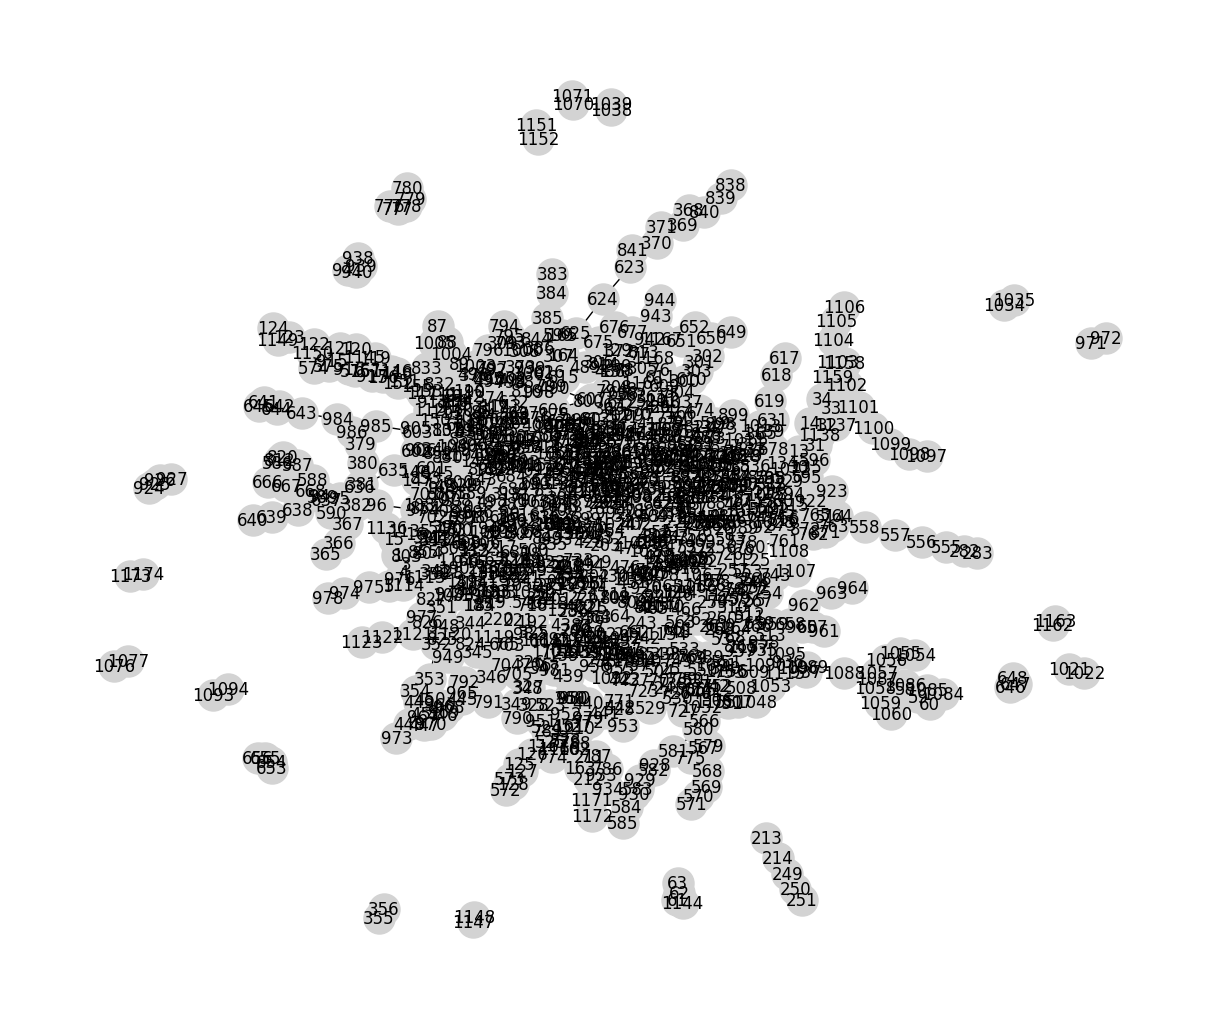

In [35]:
G= nx.read_edgelist("euroroad.txt", nodetype=int, data=(('weight',float),))

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [36]:
# Transformamos o grafo em uma rede sem direção.

G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

In [38]:
# Calculando a distribuiçaõ do grau

def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [43]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

H = shannon_entropy(G)
print("Entropia de Shannon = ", round(H,1))

Entropia de Shannon =  2.0


# **Questão 4:** Calcule as medidas transitivity e average clustering coefficient para a base de dados de aeroportos do EUA (base usairport.txt).

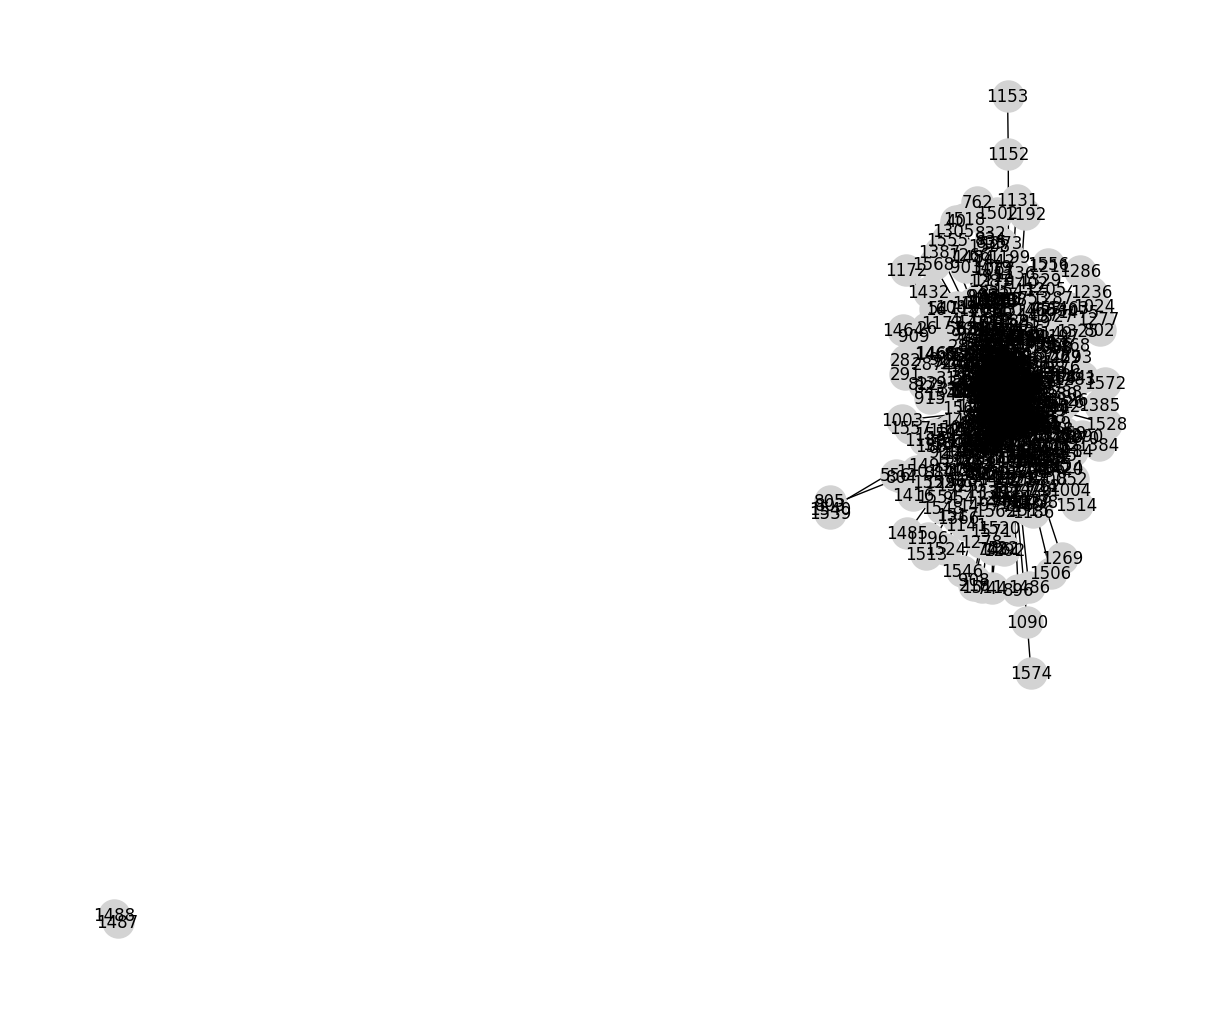

In [44]:
G= nx.read_edgelist("usairport.txt", nodetype=int, data=(('weight',float),))

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [45]:
# Transformamos o grafo em uma rede sem direção.

G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

In [47]:
CC = (nx.transitivity(G))
print("Transitividade = ", round(CC, 2))

Transitividade =  0.38


In [49]:
avc = nx.average_clustering(G)
print("Clusterização média:", round(avc, 2))

Clusterização média: 0.5


Assim, temos que os valores para a transitividade e o coeficiente de clusterização médio são, respectivamente, 0.38 e 0.5

# **Questão 5:** Calcule o coeficiente de complexidade e a entropia de Shannon para a rede de aeroportos dos EUA (base usairport.txt).

Considerando que a base já foi importada, temos que:

In [83]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

print('O coeficiente de complexidade é igual a', round(momment(G,2)/momment(G,1), 1))

O coeficiente de complexidade é igual a 112.2


In [76]:
# Calculando a distribuiçaõ do grau

def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [81]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

H = shannon_entropy(G)
print("Entropia de Shannon = ", round(H,2))

Entropia de Shannon =  4.99


Assim, temos que os valores para o coeficiente de complexidade e para a entropia de Shannon são, respectivamente, 112.2 e 4.99.